In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
n = 5  # número de guichês de atendimento
μ = 0.5  # taxa de atendimento do guichê
λ = 3  # taxa de chegada dos clientes
T = 50  # tempo total de funcionamento do sistema (em minutos)
N = 5000  # número de repetições da simulação

In [40]:
def simular_atendimento_com_fila(n, μ, λ, T, N):
    x_historic = [] # resultados de clientes atendidos
    y_historic = [] # resultados de clientes que foram embora
    w_historic = [] # resultados de proporção de clientes que foram embora
  
    x_total = 0  # contador total de clientes atendidos
    y_total = 0  # contador total de clientes que foram embora
    r_total = 0  # comprimento total da fila
    tm_total = 0  # tempo máximo de permanência
    
    for _ in range(N):
        Tu = 0  # instante de chegada do último cliente até o momento
        tdisp = np.zeros(n)  # instante em que cada guichê estará disponível
        k = 0  # contador de clientes que entraram na fila até o momento
        tcheg = []  # instante em que cada cliente chegou
        x = 0  # contador de clientes atendidos
        y = 0  # contador de clientes que foram embora
        r = 0  # comprimento atual da fila
        tm = 0  # tempo máximo de permanência
        
        while Tu < T:
            z = np.random.exponential(scale=1/λ)  # intervalo de tempo até a chegada do próximo cliente
            Tu += z  # instante de chegada do próximo cliente
            tcheg.append(Tu)
            
            # Verificar o comprimento da fila
            pr = r / (r + n) if r != 0 else 0  # probabilidade do cliente ir embora
            if np.random.rand() < pr:
                y += 1  # cliente vai embora
            else:
                # Cliente entra na fila
                k += 1
                r += 1
                
                # Atendimento do cliente na fila
                if np.any(Tu >= tdisp):
                    idx_guiche = np.argmin(tdisp)  # encontrar o guichê disponível mais cedo
                    tdisp[idx_guiche] = Tu + np.random.exponential(scale=1/μ)  # tempo de atendimento
                    r -= 1  # cliente sai da fila
                    x += 1  # cliente é atendido
                    tm = max(tm, Tu - tcheg[k-1])  # calcular o tempo máximo de permanência
        x_historic.append(x)
        y_historic.append(y)
        w_historic.append(y / (x + y))

        x_total += x
        y_total += y
        r_total += r
        tm_total += tm
    
    # Calcular a proporção de clientes que foram embora
    w_total = y_total / (x_total + y_total + r_total)

    x_mean = np.mean(x_historic)
    y_mean = np.mean(y_historic)
    w_mean = np.mean(w_historic)

    x_desvio = np.std(x_historic)
    y_desvio = np.std(y_historic)
    w_desvio = np.std(w_historic)
    
    # Retornar o número médio de clientes atendidos, número médio de clientes que foram embora,
    # comprimento médio da fila e tempo máximo de permanência
    return x_mean, y_mean, w_mean, x_desvio, y_desvio, w_desvio


In [41]:
x_mean, y_mean, w_mean, x_desvio, y_desvio, w_desvio = simular_atendimento_com_fila(n, μ, λ, T, N)
print(f'Número médio de clientes atendidos: {x_mean:.2f} ± {x_desvio:.2f}')
print(f'Número médio de clientes que foram embora: {y_mean:.2f} ± {y_desvio:.2f}')
print(f'Proporção média de clientes que foram embora: {w_mean:.2f} ± {w_desvio:.3f}')

Número médio de clientes atendidos: 66.06 ± 8.52
Número médio de clientes que foram embora: 75.89 ± 12.96
Proporção média de clientes que foram embora: 0.53 ± 0.065


In [42]:
amplitude = 2 * 1.96 * (w_desvio / np.sqrt(N))
print(f'Intervalo de confiança de 95% para a proporção de clientes que foram embora: {w_mean:.5f} ± {amplitude:.5f}')

Intervalo de confiança de 95% para a proporção de clientes que foram embora: 0.53245 ± 0.00361


In [43]:
N = 500
interacoes = []
w_desvios = []
w_means = []
while True:
  x_mean, y_mean, w_mean, x_desvio, y_desvio, w_desvio = simular_atendimento_com_fila(n, μ, λ, T, N)
  amplitude = 2 * 1.96 * (w_desvio / np.sqrt(N))
  interacoes.append(N)
  w_means.append(w_mean)
  w_desvios.append(w_desvio)
  if amplitude < 0.002:
    break
  N += 500

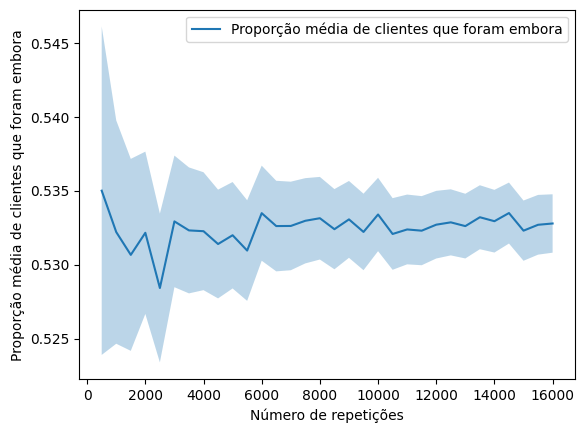

In [44]:
intervalo_superior = [w_means[i] + 2 * 1.96 * (w_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
intervalo_inferior = [w_means[i] - 2 * 1.96 * (w_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
plt.plot(interacoes, w_means, label='Proporção média de clientes que foram embora')
plt.fill_between(interacoes, intervalo_inferior, intervalo_superior, alpha=0.3)
plt.xlabel('Número de repetições')
plt.ylabel('Proporção média de clientes que foram embora')
plt.legend()
plt.show()